C:\Users\admin\AppData\Local\Temp\ipykernel_8144\2086085902.py:10: DtypeWarning: Columns (6,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,226,227,228,229,231,232,235,237) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('completeData.csv

    years_or_months_experience  \
0                            5   
4                            1   
7                            3   
8                            5   
11                           2   

                                       orgTags_SKILLS  
0   ['Underwriting', 'Communication', 'Loans', 'Lo...  
4   ['Software Quality Assurance (SQA)', 'Product ...  
7   ['JavaScript (Programming Language)', 'Extensi...  
8   ['Onboarding', 'Background Checks', 'Recruitme...  
11  ['Selling Techniques', 'Multilingualism', 'Cus...  
(26580, 2)
    years_or_months_experience  \
0                            5   
4                            1   
7                            3   
8                            5   
11                           2   

                                       orgTags_SKILLS  
0   [[, ', u, n, d, e, r, w, r, i, t, i, n, g, ', ...  
4   [[, ', s, o, f, t, w, a, r, e, , q, u, a, l, i...  
7   [[, ', j, a, v, a, s, c, r, i, p, t, , , p, r,...  
8   [[, ', o, n, b,

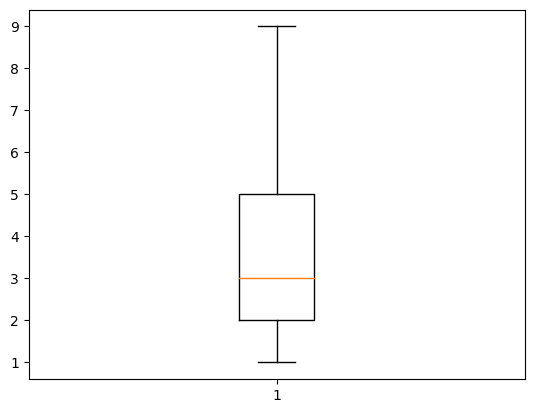

In [3]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import ast
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt

df = pd.read_csv('completeData.csv')
df= df[['years_or_months_experience','orgTags_SKILLS']]
df = df.dropna()
#contains years
df = df[df['years_or_months_experience'].str.contains('years')]
#remove years from each row
df['years_or_months_experience'] = df['years_or_months_experience'].str.replace('years','')
#add int to years
df['years_or_months_experience'] = df['years_or_months_experience'].astype(int)
df = df[df['years_or_months_experience'] != 0]
df = df[df['years_or_months_experience'] < 10]
plt.boxplot(df['years_or_months_experience'])


df=df[df['orgTags_SKILLS'].str.contains('NOT FOUND')==False]

print(df.head())
print(df.shape)

df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: ast.literal_eval(x))
df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: [y.lower() for y in x])
df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: [y.replace(" ","") for y in x])
df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: [y.replace("(","") for y in x])
df['orgTags_SKILLS'] = df['orgTags_SKILLS'].apply(lambda x: [y.replace(")","") for y in x])
print(df.head())
print(df.shape)

mlb = MultiLabelBinarizer()
df_pd = df.join(pd.DataFrame(mlb.fit_transform(df.pop('orgTags_SKILLS')),
                          columns=mlb.classes_,
                          index=df.index))
print(df_pd.head())
# model_experience = LinearRegression()
# X = df_pd.drop('years_or_months_experience', axis=1)
# y = df_pd['years_or_months_experience']

# model_experience.fit(X, y)
# y_pred = model_experience.predict(X)
# print("error",mean_squared_error(y, y_pred))
# plt.scatter(y, y_pred)
# plt.xlabel('True Values')
# plt.ylabel('Predictions')
# plt.show()
# # #percsion recall f1 score calcaulation
# # from sklearn.metrics import precision_score
# # from sklearn.metrics import recall_score
# # from sklearn.metrics import f1_score
# # y_pred = y_pred.astype(int)
# # y = y.astype(int)
# # print("precision",precision_score(y, y_pred, average='micro'))
# # print("recall",recall_score(y, y_pred, average='micro'))
# # print("f1",f1_score(y, y_pred, average='micro'))



In [2]:
#percsion recall f1 score calcaulation
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_pred = y_pred.astype(int)
y = y.astype(int)
print("precision",precision_score(y, y_pred, average='micro'))
print("recall",recall_score(y, y_pred, average='micro'))
print("f1",f1_score(y, y_pred, average='micro'))

precision 0.3466139954853273
recall 0.3466139954853273
f1 0.3466139954853273


In [6]:
def predict_years_of_experience(skills):
    # Prepare the input data
    skills = [skill.lower().replace(" ","") for skill in skills]
    input_data = pd.DataFrame(mlb.transform([skills]), columns=mlb.classes_)

    # Predict years of experience
    years_of_experience = model_experience.predict(input_data)
    return years_of_experience[0]

# Example usage
skills = ['python','aws','sql','c']
predicted_years = predict_years_of_experience(skills)
print(f"Predicted years of experience for skills {skills}: {predicted_years}")

Predicted years of experience for skills ['python', 'aws', 'sql', 'c']: 4.083437752275201
